In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

categorical_features = [
    'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
    'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
    'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity'
]

In [16]:
print("--- Loading Dataset ---")
df_raw = pd.read_csv('diabetes_data_upload.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df_raw.shape}")

--- Loading Dataset ---
Dataset loaded successfully!
Dataset shape: (520, 17)


In [17]:
print("\n--- Starting Exploratory Data Analysis (EDA) ---")
df_eda = df_raw.copy()


--- Starting Exploratory Data Analysis (EDA) ---


In [18]:
print("\nDataset Info:")
df_eda.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class      

In [19]:
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-talk')


C:\Users\USER\AppData\Local\Temp\ipykernel_13448\2981925105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_eda, palette=['#43a047', '#e53935'])


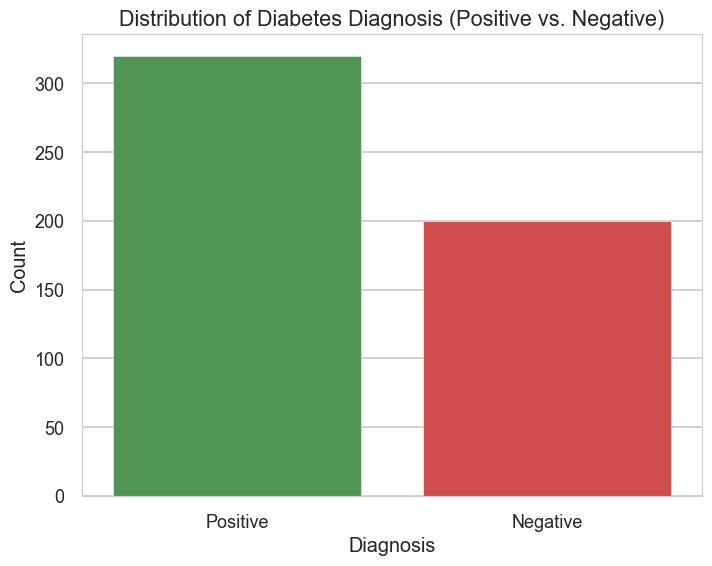


Generated 'class_distribution.png'


In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df_eda, palette=['#43a047', '#e53935'])
plt.title('Distribution of Diabetes Diagnosis (Positive vs. Negative)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.savefig("class_distribution.png")
plt.show()
print("\nGenerated 'class_distribution.png'")


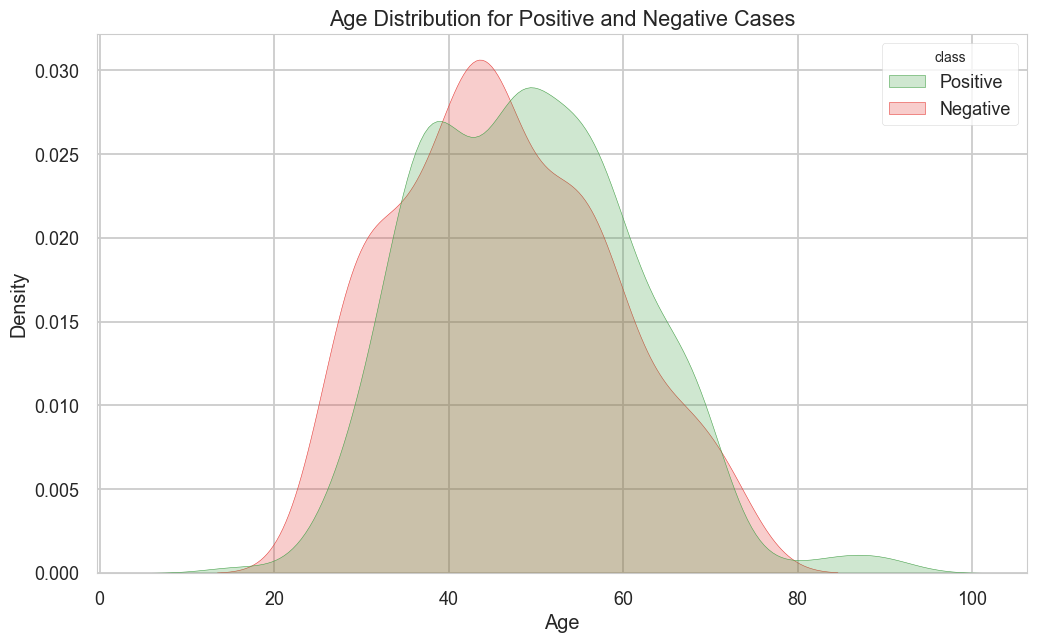

Generated 'age_distribution_by_class.png'


In [21]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_eda, x='Age', hue='class', fill=True, palette=['#43a047', '#e53935'], common_norm=False)
plt.title('Age Distribution for Positive and Negative Cases')
plt.xlabel('Age')
plt.ylabel('Density')
plt.savefig("age_distribution_by_class.png")
plt.show()
print("Generated 'age_distribution_by_class.png'")

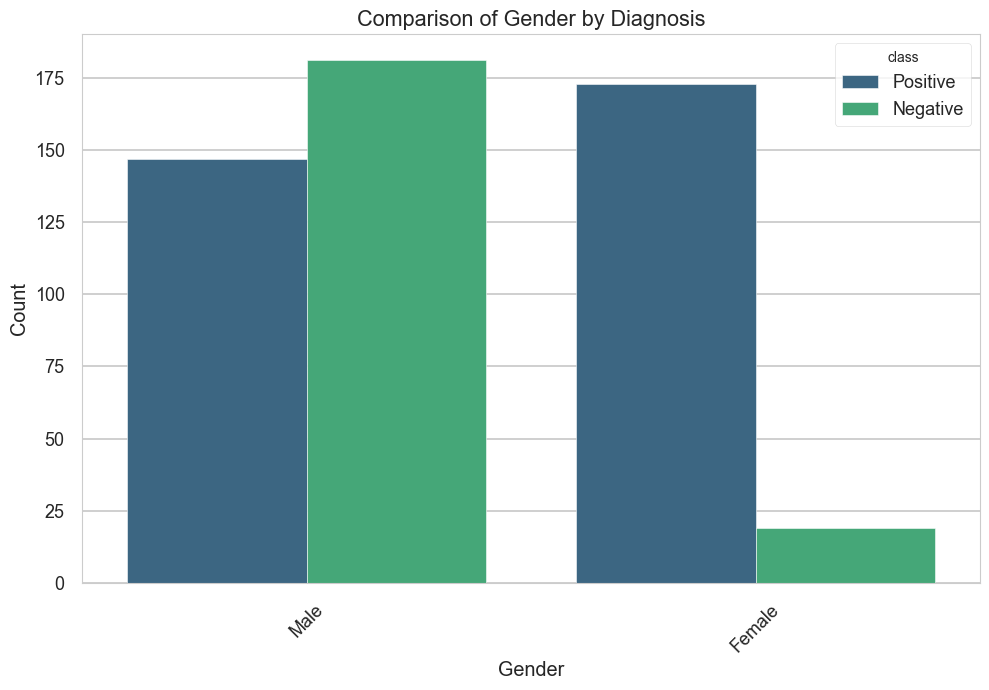

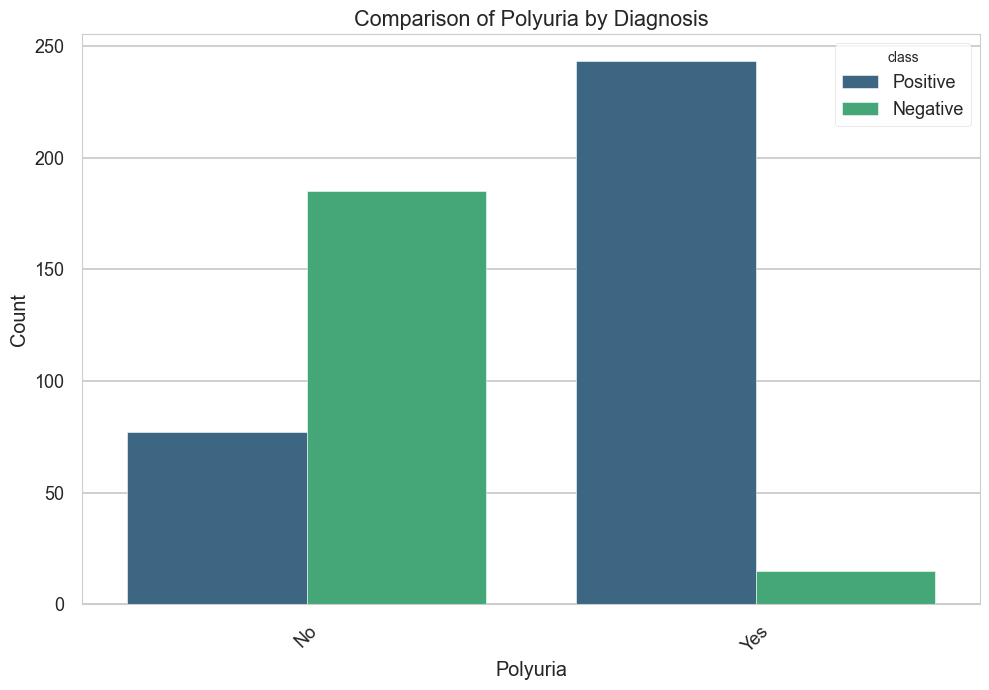

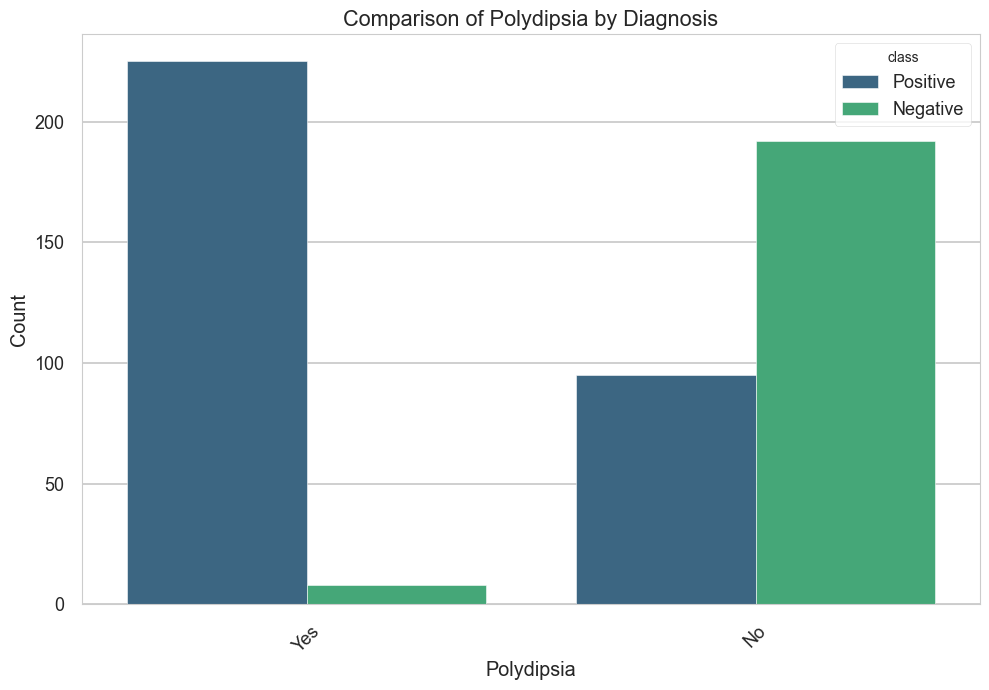

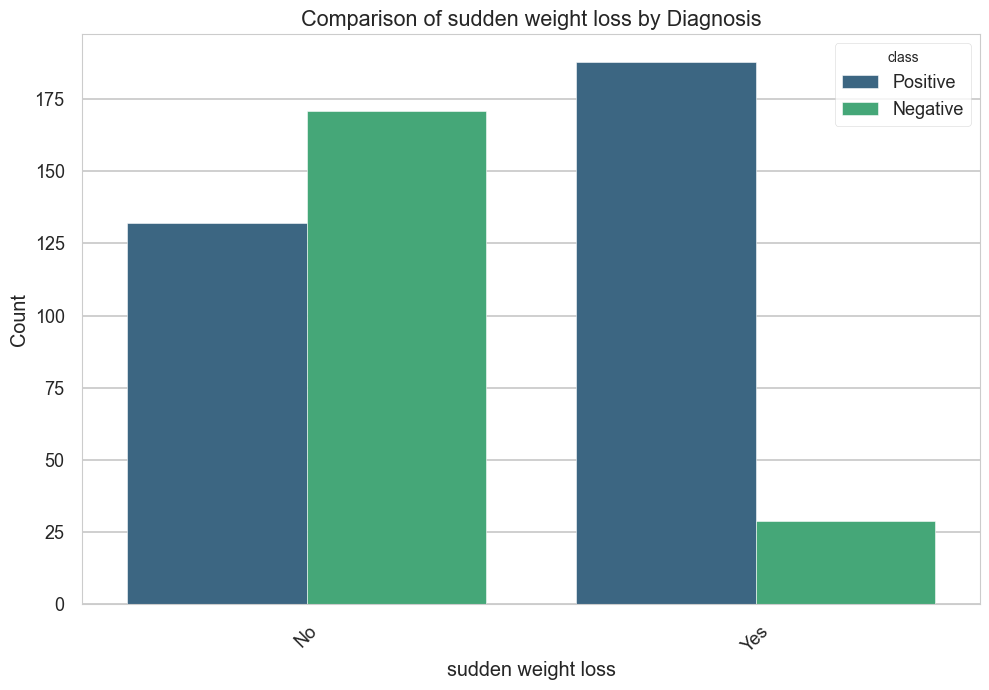

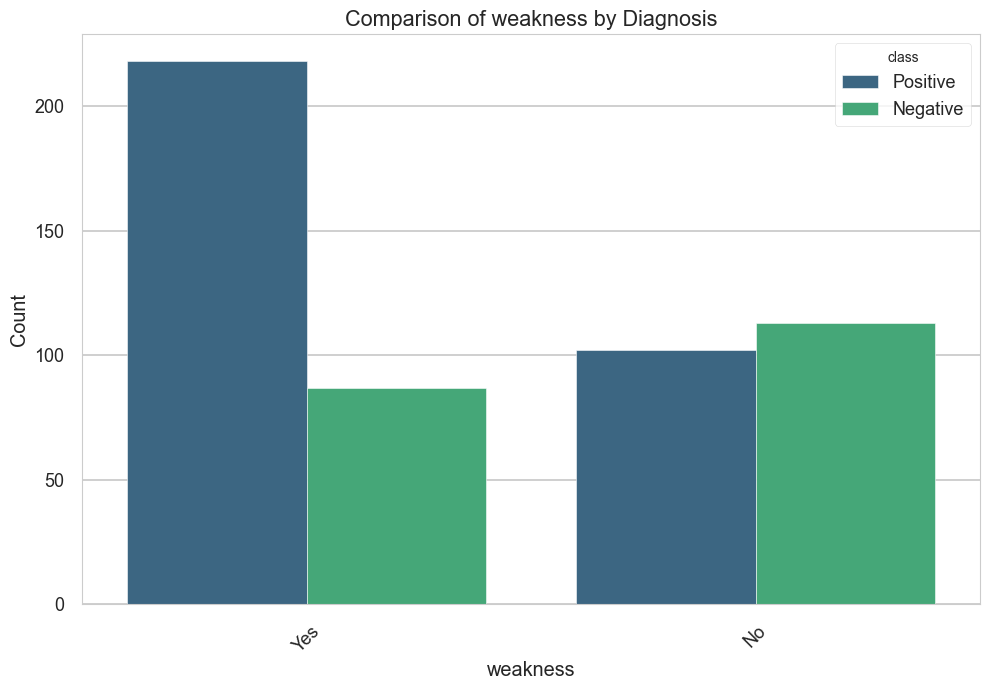

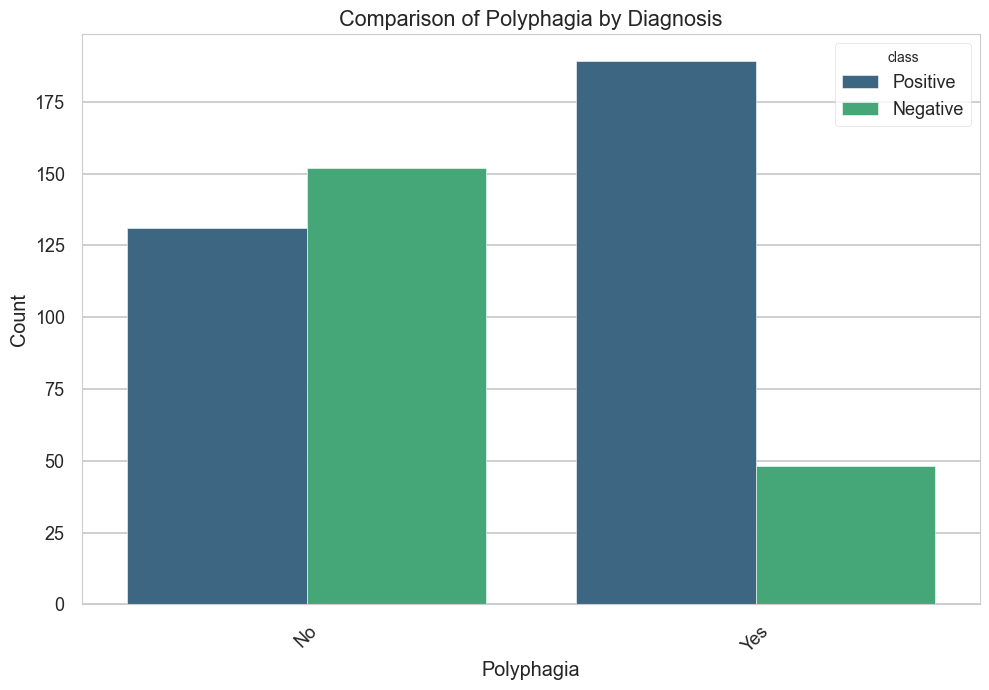

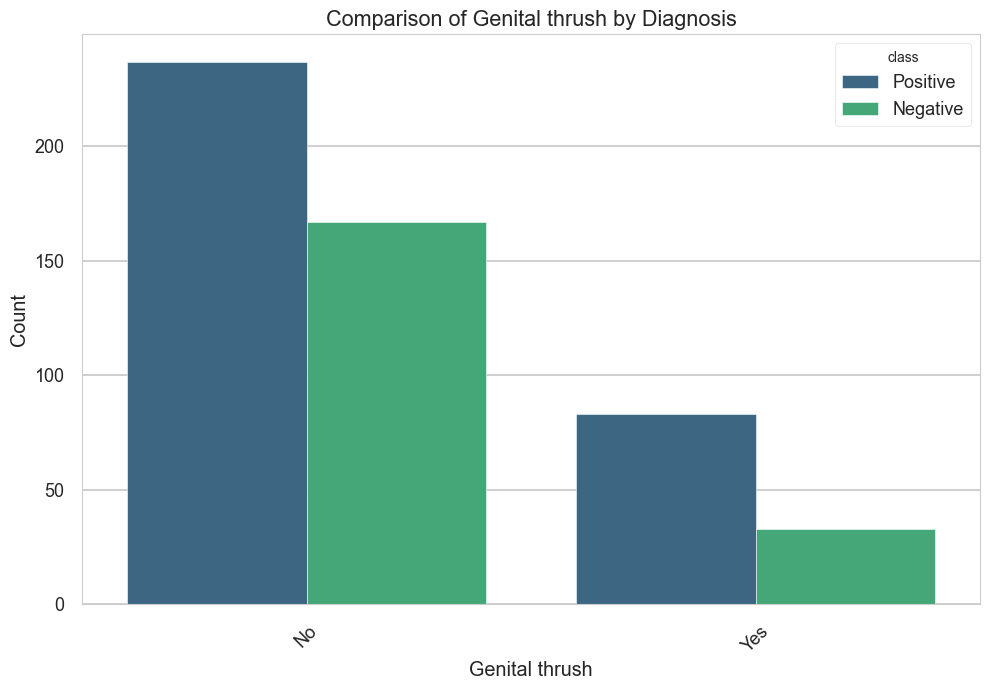

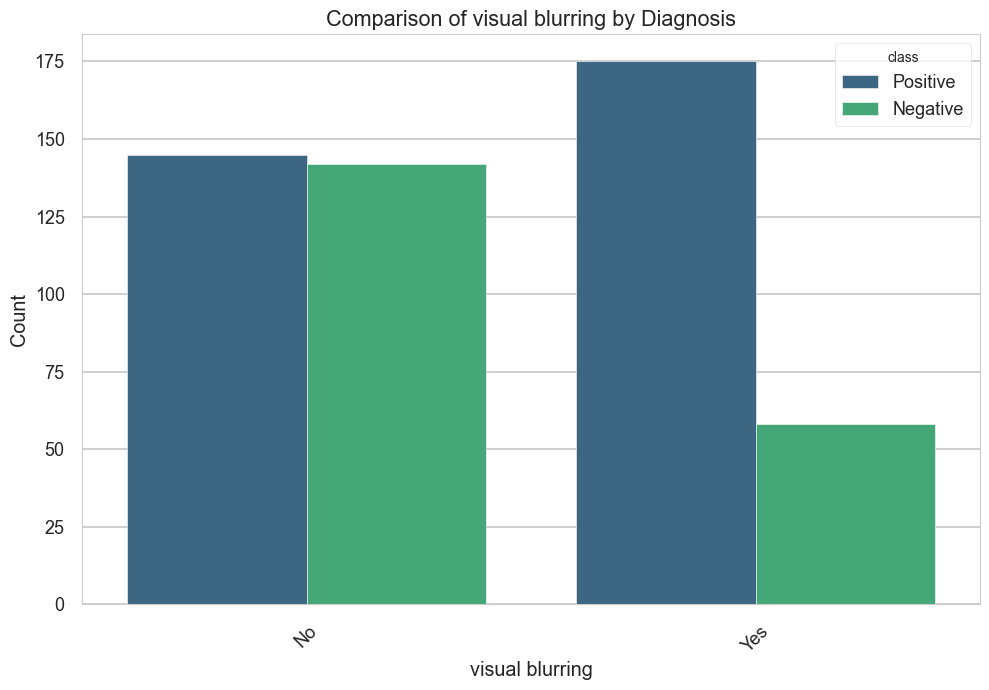

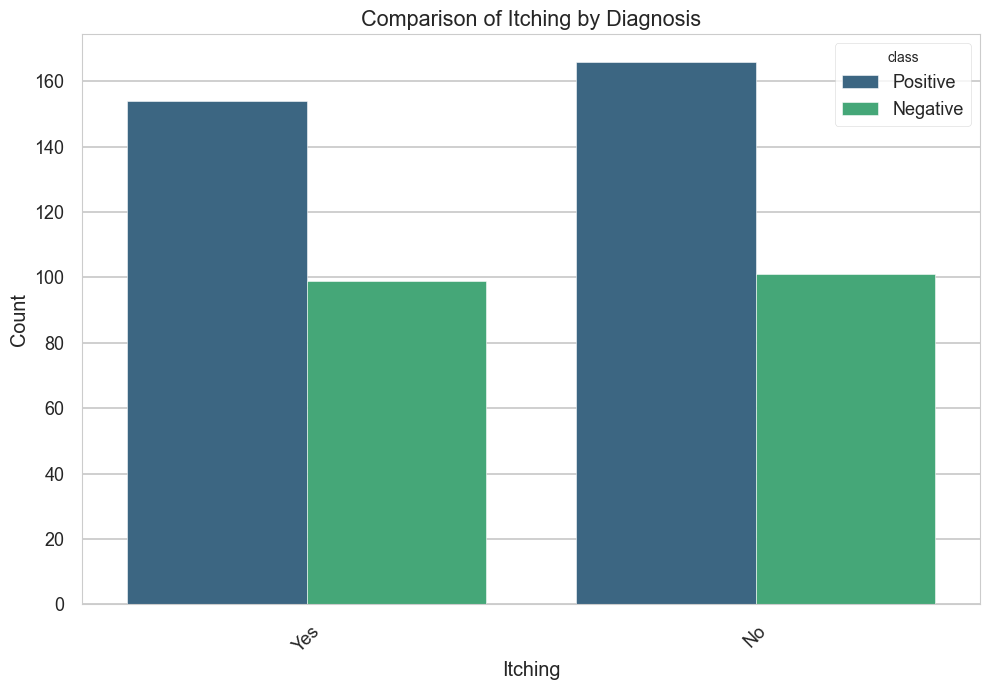

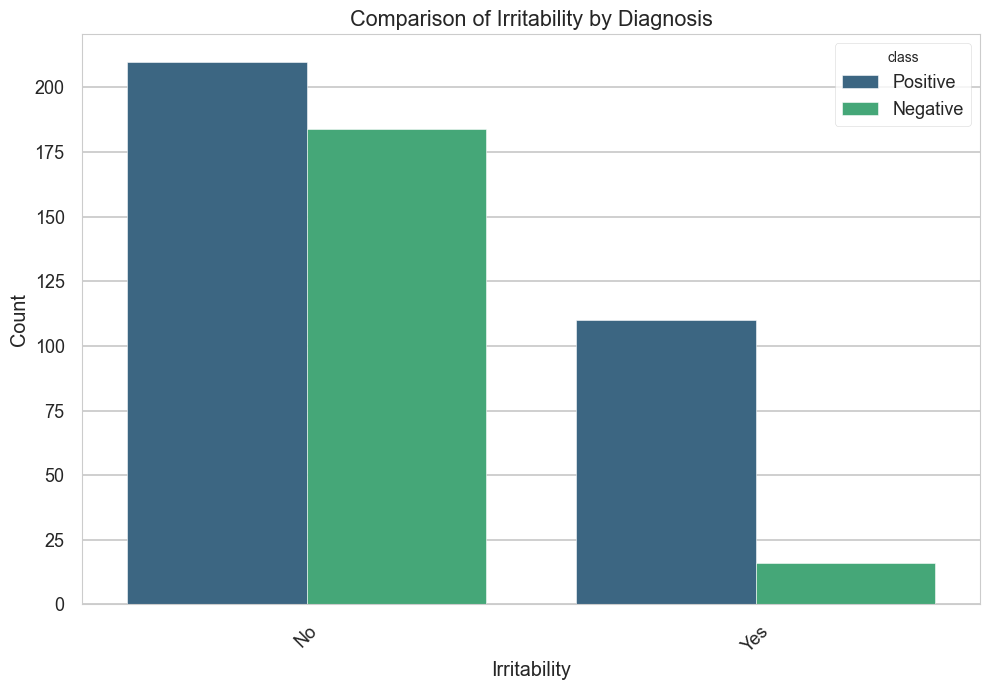

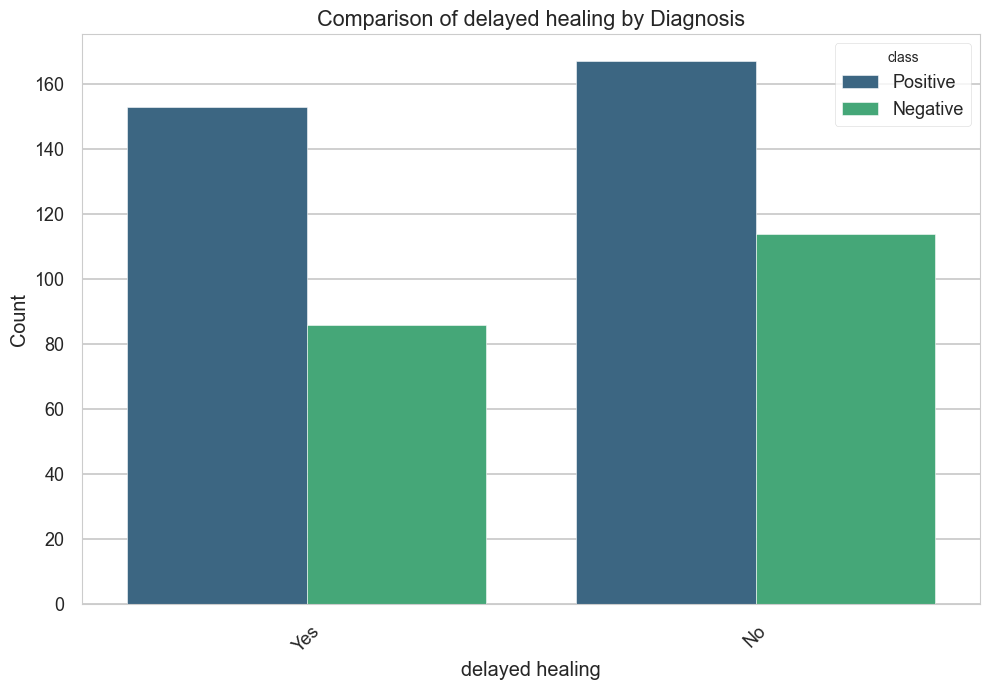

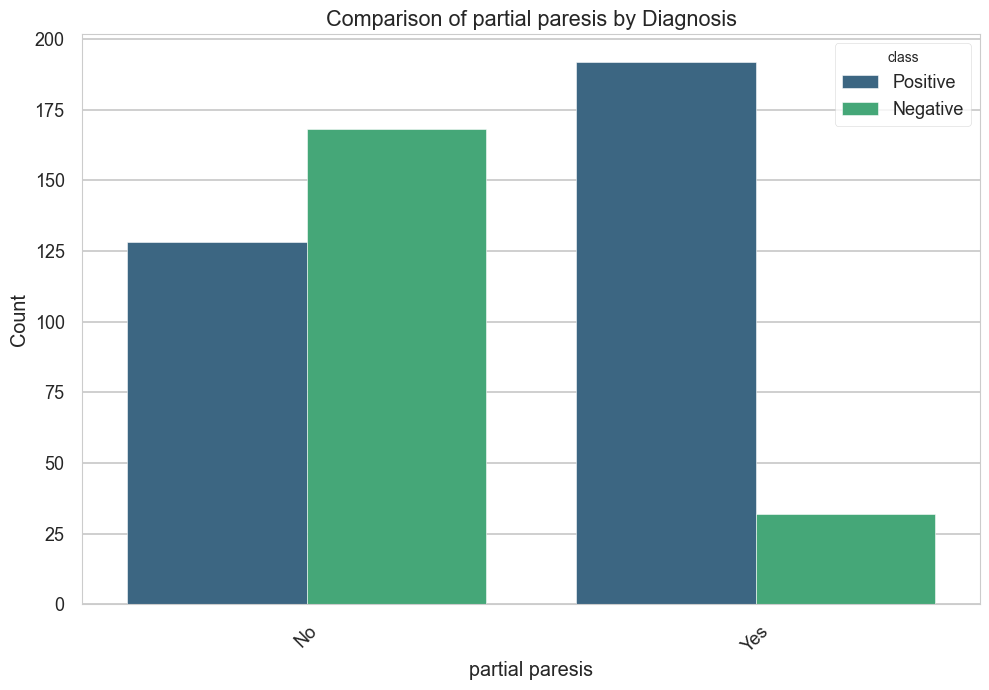

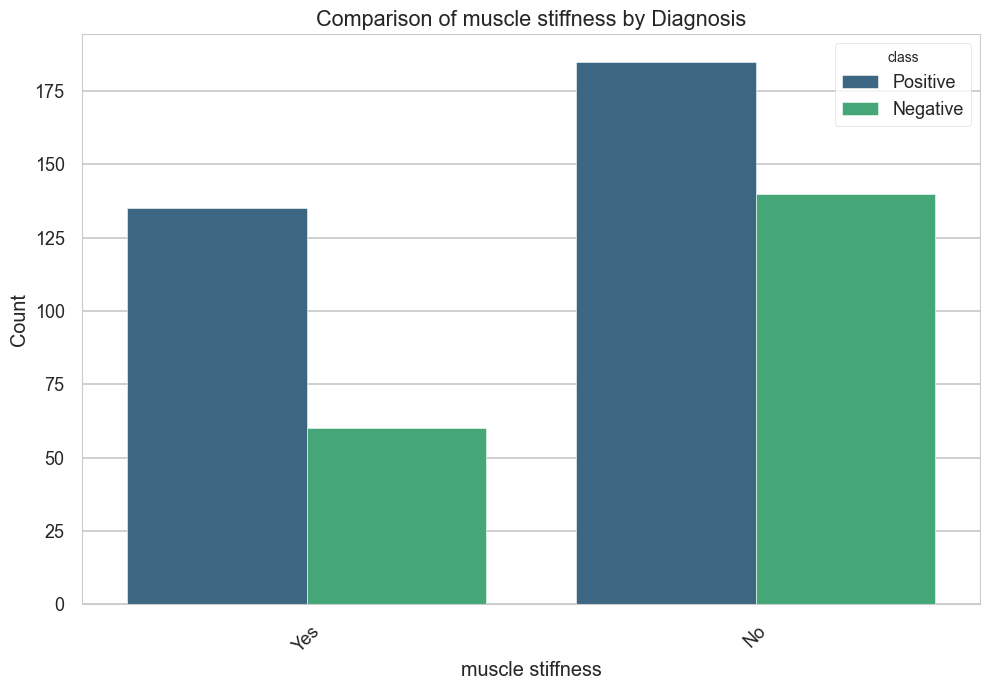

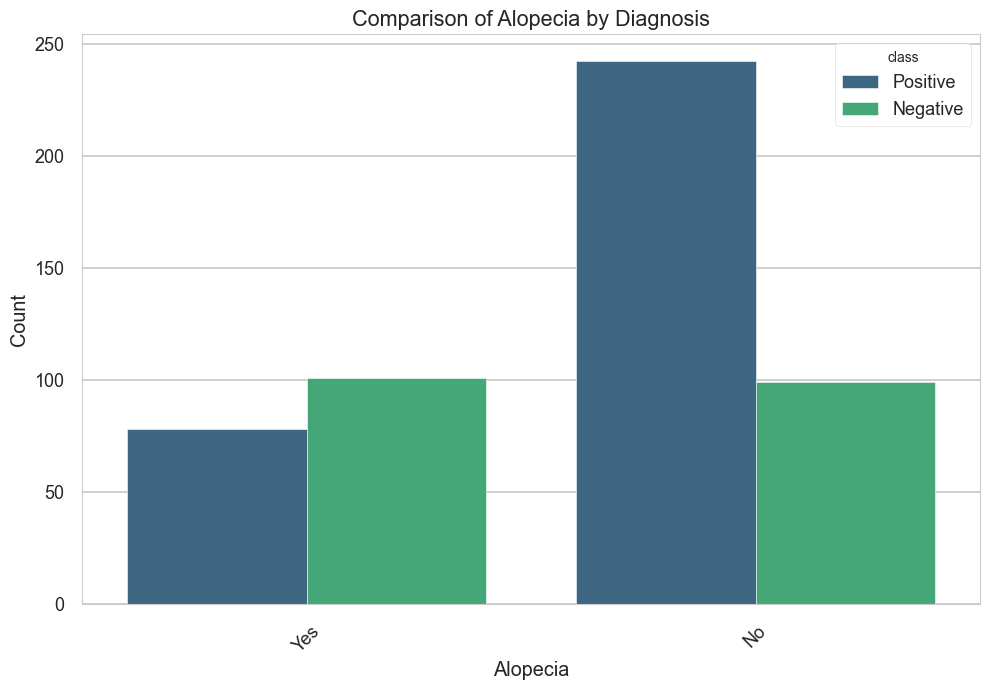

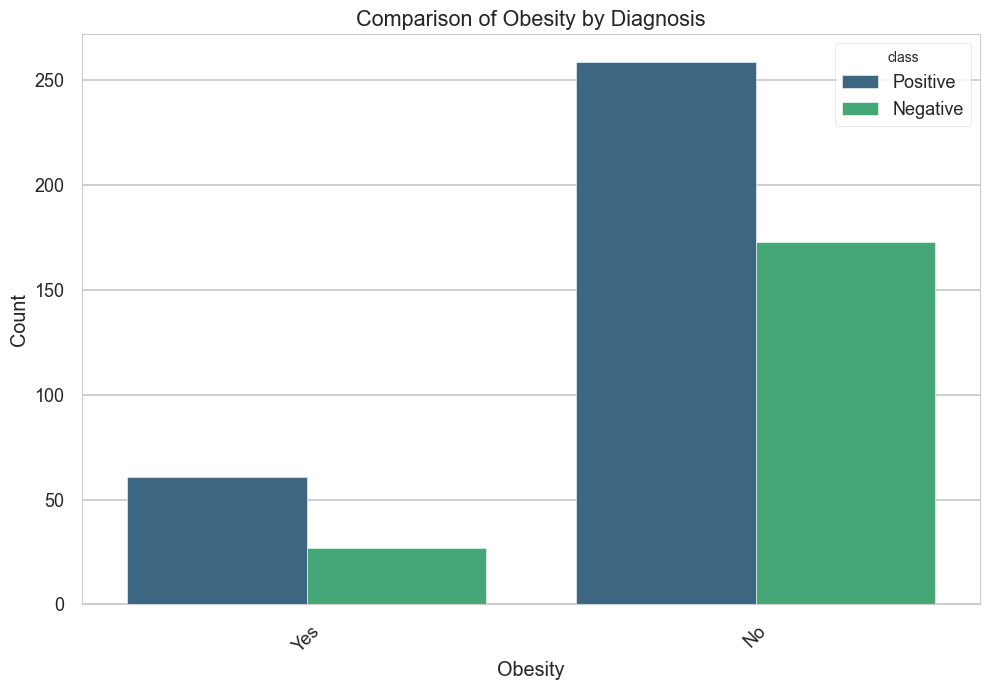

In [22]:
for feature in categorical_features:
    plt.figure(figsize=(10, 7))
    sns.countplot(x=feature, hue='class', data=df_eda, palette='viridis', dodge=True)
    plt.title(f'Comparison of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{feature}_vs_class.png")
    plt.show()  # <- This will display the chart in the notebook
    plt.close()


--- Starting Data Preprocessing for Modeling ---
Data encoded successfully.

Sample of encoded data:
   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0           0                   1         1   
4   60       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  m

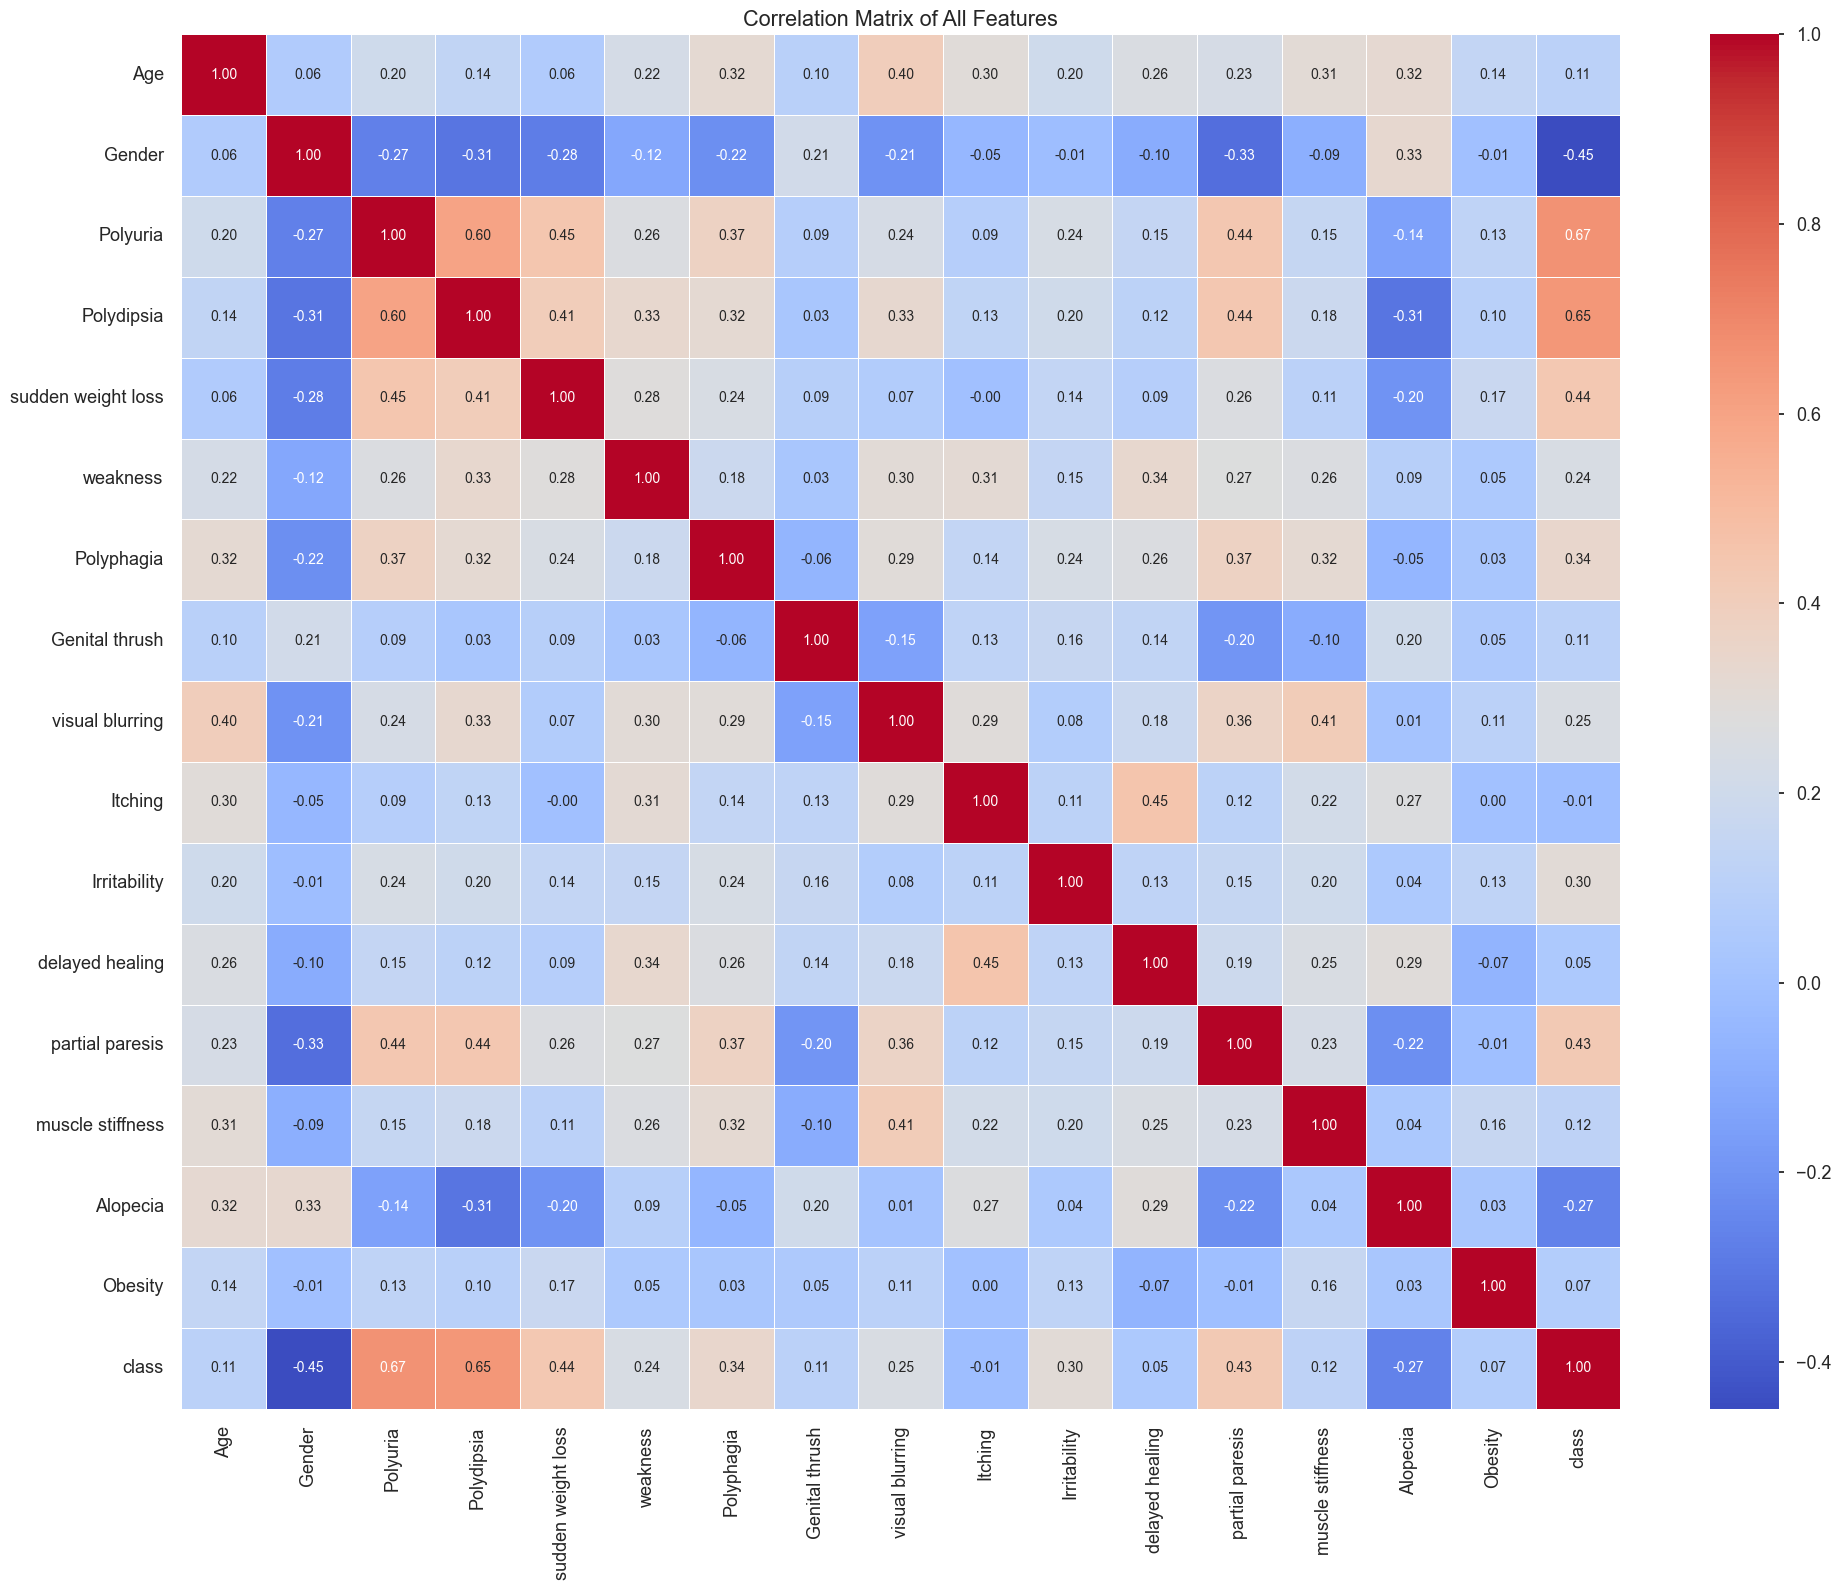

Generated 'correlation_heatmap.png'


In [23]:
print("\n--- Starting Data Preprocessing for Modeling ---")
df_model = df_raw.copy()
le = LabelEncoder()

# Encode all categorical features to numerical
for column in df_model.columns:
    if df_model[column].dtype == 'object':
        df_model[column] = le.fit_transform(df_model[column])
print("Data encoded successfully.")
print("\nSample of encoded data:")
print(df_model.head())

# d) Correlation Matrix Heatmap
print("\nGenerating Correlation Heatmap as requested...")
plt.figure(figsize=(20, 16))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()
print("Generated 'correlation_heatmap.png'")

In [24]:
X = df_model.drop('class', axis=1)
y = df_model['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nData split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")


Data split into training (390 samples) and testing (130 samples) sets.



--- Training and Evaluating Models ---

----- Evaluating: Gradient Boosting -----
Gradient Boosting trained.

Accuracy: 98.46%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98        50
    Positive       0.99      0.99      0.99        80

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



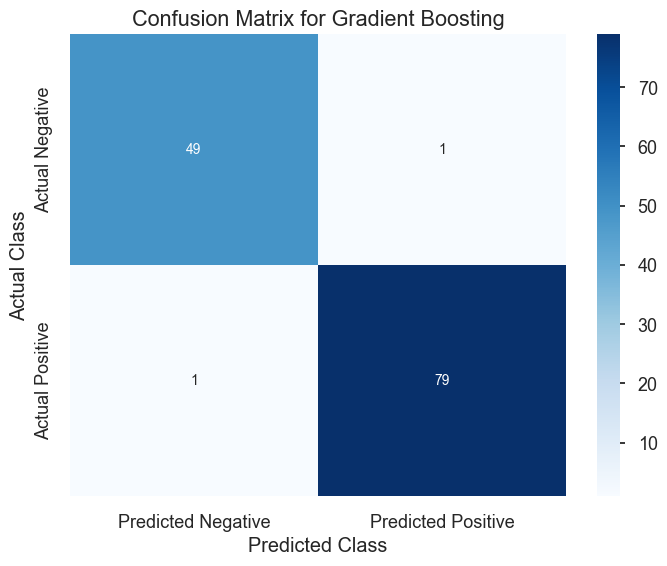

Generated 'Gradient Boosting_confusion_matrix.png'

----- Evaluating: Random Forest -----
Random Forest trained.

Accuracy: 99.23%

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.98      0.99        50
    Positive       0.99      1.00      0.99        80

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



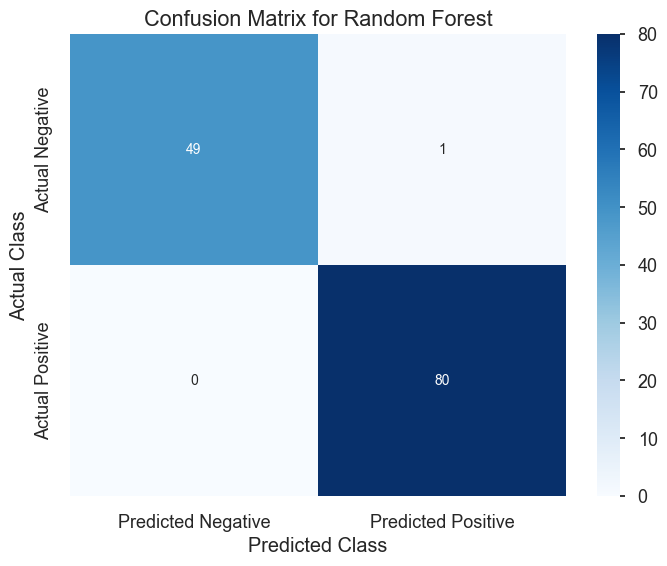

Generated 'Random Forest_confusion_matrix.png'


In [25]:
print("\n--- Training and Evaluating Models ---")
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"\n----- Evaluating: {model_name} -----")
    
    # Train the model
    model.fit(X_train, y_train)
    print(f"{model_name} trained.")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    print(f"\nAccuracy: {accuracy * 100:.2f}%")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f"{model_name}_confusion_matrix.png")
    plt.show()
    print(f"Generated '{model_name}_confusion_matrix.png'")


--- Final Model Comparison ---
               Model  Accuracy
1      Random Forest  0.992308
0  Gradient Boosting  0.984615


C:\Users\USER\AppData\Local\Temp\ipykernel_13448\466126543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='magma')


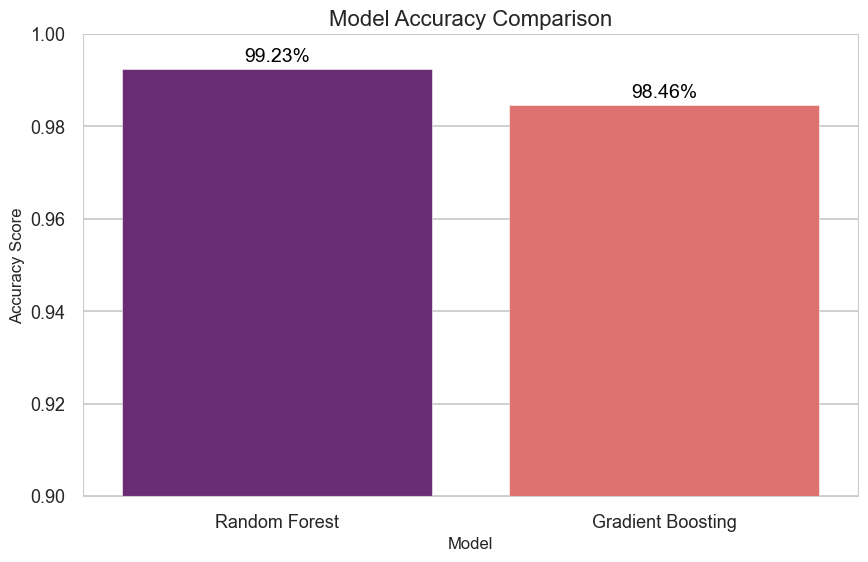


Generated 'model_comparison.png'

--- Analysis Complete ---


In [26]:
print("\n--- Final Model Comparison ---")

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy']).sort_values('Accuracy', ascending=False)
print(results_df)

# Plotting the comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='magma')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.9, 1.0)

# Add accuracy values on top of the bars
for p in ax.patches:
    height = p.get_height() if hasattr(p, 'get_height') else None
    width = p.get_width() if hasattr(p, 'get_width') else None
    x = p.get_x() if hasattr(p, 'get_x') else None
    if height is not None and width is not None and x is not None:
        ax.annotate(f'{height * 100:.2f}%',
                    (x + width / 2., height),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=14, color='black')

plt.savefig("model_comparison.png")
plt.show()
print("\nGenerated 'model_comparison.png'")

print("\n--- Analysis Complete ---")

In [27]:
print("\n--- Live Prediction Questionnaire ---")

# Let's find the best model from our training
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"Using the best model for prediction: {best_model_name}")

def get_user_input():
    """Gathers and validates user input for all features using specific questions."""
    print("\nPlease answer the following questions for a live prediction.")


--- Live Prediction Questionnaire ---
Using the best model for prediction: Random Forest


In [28]:
def get_user_input():
    """Gathers and validates user input for all features using specific questions."""
    print("\nPlease answer the following questions for a live prediction.")
    
    user_data = {}
    
    # Define the exact questions to be asked
    questions = [
        {'col': 'Age', 'q': '1. What is your age? '},
        {'col': 'Gender', 'q': '2. What is your gender? (Male/Female): '},
        {'col': 'Polyuria', 'q': '3. Are you experiencing excessive urination? (Polyuria) (Yes/No): '},
        {'col': 'Polydipsia', 'q': '4. Are you experiencing excessive thirst? (Polydipsia) (Yes/No): '},
        {'col': 'sudden weight loss', 'q': '5. Have you experienced sudden, unexplained weight loss? (Yes/No): '},
        {'col': 'weakness', 'q': '6. Do you often feel a sense of weakness or fatigue? (Yes/No): '},
        {'col': 'Polyphagia', 'q': '7. Are you experiencing excessive hunger? (Polyphagia) (Yes/No): '},
        {'col': 'Genital thrush', 'q': '8. Have you had a fungal infection in the genital area? (Genital thrush) (Yes/No): '},
        {'col': 'visual blurring', 'q': '9. Are you experiencing any visual blurring? (Yes/No): '},
        {'col': 'Itching', 'q': '10. Do you have persistent itching on your skin? (Yes/No): '},
        {'col': 'Irritability', 'q': '11. Have you been feeling more irritable than usual? (Yes/No): '},
        {'col': 'delayed healing', 'q': '12. Do your cuts or wounds take longer than usual to heal? (Delayed healing) (Yes/No): '},
        {'col': 'partial paresis', 'q': '13. Have you experienced partial paralysis or severe weakness in a limb? (Partial Paresis) (Yes/No): '},
        {'col': 'muscle stiffness', 'q': '14. Do you suffer from muscle stiffness? (Yes/No): '},
        {'col': 'Alopecia', 'q': '15. Are you experiencing hair loss? (Alopecia) (Yes/No): '},
        {'col': 'Obesity', 'q': '16. Are you considered obese? (Yes/No): '}
    ]

    for item in questions:
        col_name = item['col']
        question_text = item['q']
        
        while True:
            answer = input(question_text).strip().capitalize()
            # Validate input based on question type
            if col_name == 'Age':
                try:
                    user_data[col_name] = int(answer)
                    break
                except ValueError:
                    print("Invalid input. Please enter a number for age.")
            elif col_name == 'Gender':
                if answer in ['Male', 'Female']:
                    user_data[col_name] = answer
                    break
                else:
                    print("Invalid input. Please enter 'Male' or 'Female'.")
            else: # For all Yes/No questions
                if answer in ['Yes', 'No']:
                    user_data[col_name] = answer
                    break
                else:
                    print("Invalid input. Please enter 'Yes' or 'No'.")
    
    return user_data

# Get input from the user
try:
    live_input = get_user_input()

    # Convert user input to a DataFrame
    input_df = pd.DataFrame([live_input])

    # Manual Encoding based on our dataset's logic
    encoding_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
    for col in input_df.columns:
        if input_df[col].dtype == 'object':
            input_df[col] = input_df[col].map(encoding_map)

    # Ensure column order is the same as the training data
    input_df = input_df[X.columns]


 # Make prediction
    prediction = best_model.predict(input_df)
    prediction_proba = best_model.predict_proba(input_df)

    # Display result
    print("\n--- Prediction Result ---")
    if prediction[0] == 1:
        print("The model predicts a POSITIVE case for diabetes.")
        print(f"Confidence: {prediction_proba[0][1]*100:.2f}%")
    else:
        print("The model predicts a NEGATIVE case for diabetes.")
        print(f"Confidence: {prediction_proba[0][0]*100:.2f}%")
    
    print("\n*** IMPORTANT DISCLAIMER ***")
    print("This prediction is based on a machine learning model and is for educational purposes only.")
    print("It is NOT a substitute for professional medical advice. Please consult a doctor for an accurate diagnosis.")

except (KeyboardInterrupt, EOFError):
    print("\n\nPrediction cancelled by user.")


print("\n--- Analysis Complete ---")

# After training and selecting your best model (e.g., best_model)
# Save the best model to a .pkl file
joblib.dump(best_model, '../models/diabetes_model.pkl')

# If you used a LabelEncoder for any categorical columns and want to reuse it, save it too
joblib.dump(le, '../models/diabetes_label_encoder.pkl')

print("✅ Model and label encoder exported to '../models/diabetes_model.pkl' and '../models/diabetes_label_encoder.pkl'")



Please answer the following questions for a live prediction.

--- Prediction Result ---
The model predicts a POSITIVE case for diabetes.
Confidence: 53.00%

*** IMPORTANT DISCLAIMER ***
This prediction is based on a machine learning model and is for educational purposes only.
It is NOT a substitute for professional medical advice. Please consult a doctor for an accurate diagnosis.

--- Analysis Complete ---
✅ Model and label encoder exported to '../models/diabetes_model.pkl' and '../models/diabetes_label_encoder.pkl'


In [29]:
import joblib

# After training and selecting your best model (e.g., best_model)
# Save the best model to a .pkl file
joblib.dump(best_model, 'project/models/diabetes_model.pkl')

# If you used a LabelEncoder for any categorical columns and want to reuse it, save it too
joblib.dump(le, 'project/models/diabetes_label_encoder.pkl')

print("✅ Model and label encoder exported to '../models/diabetes_model.pkl' and '../models/diabetes_label_encoder.pkl'")

✅ Model and label encoder exported to '../models/diabetes_model.pkl' and '../models/diabetes_label_encoder.pkl'
